#### Question 1
Write Load the "Country-data.csv" dataset into a DataFrame and perform the followingtasks:

1.Create a seperateDataFrame with only numeric data by remove the "country"column

2.Scale the data using the Standard Scaler to create a scaled DataFrame

3.Plotting dendograms with the complete linkage method

4.Creating cluster labels using cut tree

5.Perform the 4-Component PCA on DataFrame

6.Now, from final the DataFrame, analyze how low GDP rate corresponds to the child mortality rate around the world

In [1]:
import pandas as pd
import numpy as np
from scipy import integrate
import seaborn as sns
import matplotlib.pyplot as mp
import plotly.offline as pyo
import plotly.graph_objs as go;
import pandas_datareader as datareader
import datetime as dt
import math
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("D:\Shivam\study material\CSV\Country-data.csv")
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
data.describe(include='all')

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
unique,167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,NaN,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,NaN,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,NaN,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,NaN,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,NaN,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000


### 1.Create a seperateDataFrame with only numeric data by remove the "country"column


In [5]:
data.drop('country',axis=1,inplace=True)
data


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### 2.Scale the data using the Standard Scaler to create a scaled DataFrame

In [6]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
scaled_data=pd.DataFrame(Sc.fit_transform(data),columns=data.columns)

scaled_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


### 3.Plotting dendograms with the complete linkage method

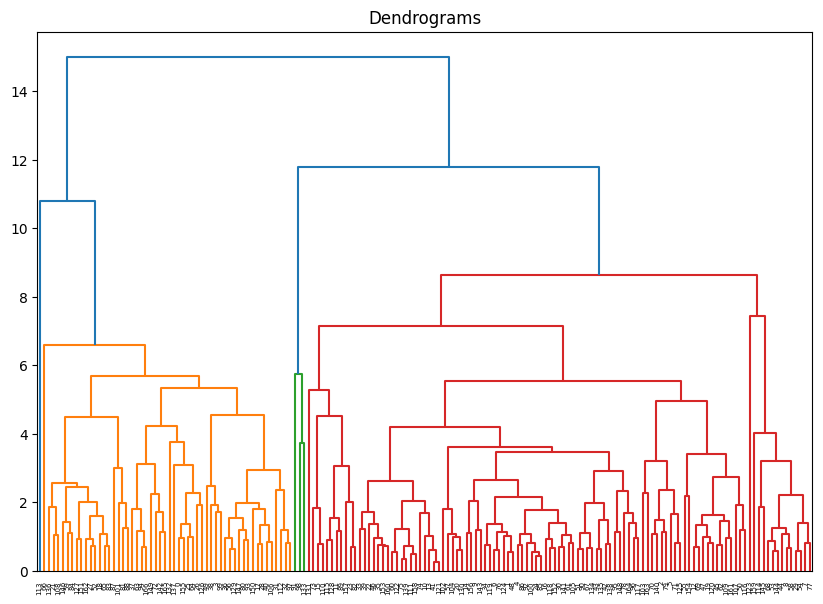

In [7]:
from scipy.cluster.hierarchy import dendrogram,linkage
mp.figure(figsize=(10, 7))  
mp.title("Dendrograms")  
complete_linkage=linkage(scaled_data, method='complete')
dend = dendrogram(complete_linkage)


### Let us use number of cluter as 3

In [8]:
newdata=scaled_data.copy()

In [9]:
from scipy.cluster.hierarchy import fcluster


### 4.Creating cluster labels using cut tree

In [10]:
clus_lab=fcluster(complete_linkage,t=4,criterion='maxclust')
newdata['clus_lab']=clus_lab

In [11]:
newdata

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clus_lab
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,1
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,4
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,4
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,1
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,4
...,...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913,1
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323,4
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754,4
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754,1


### 5.Perform the 4-Component PCA on DataFrame

In [14]:
from sklearn.decomposition import PCA

In [15]:
scaled_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [16]:
lda=PCA(n_components=4)
lda.fit(scaled_data)
pca_data=lda.transform(scaled_data)


In [17]:
data2=pd.DataFrame(pca_data,columns=['pc1','pc2','pc3','pc4'])
data2['clus_lab']=clus_lab
data2

,pc1,pc2,pc3,pc4,clus_lab
0,-2.913025,0.095621,-0.718118,1.005255,1
1,0.429911,-0.588156,-0.333486,-1.161059,4
2,-0.285225,-0.455174,1.221505,-0.868115,4
3,-2.932423,1.695555,1.525044,0.839625,1
4,1.033576,0.136659,-0.225721,-0.847063,4
...,...,...,...,...,...
162,-0.820631,0.639570,-0.389923,-0.706595,1
163,-0.551036,-1.233886,3.101350,-0.115311,4
164,0.498524,1.390744,-0.238526,-1.074098,4
165,-1.887451,-0.109453,1.109752,0.056257,1


In [18]:
data2['clus_lab'].value_counts()

4    109
1     54
3      3
2      1
Name: clus_lab, dtype: int64

### 6.Now, from final the DataFrame, analyze how low GDP rate corresponds to the child mortality rate around the world

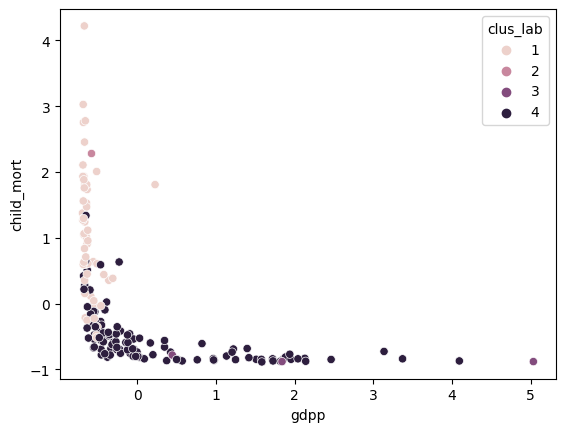

In [19]:
sns.scatterplot(x=scaled_data['gdpp'],y=scaled_data['child_mort'],color='red',hue=data2['clus_lab'])
mp.show()

### GITHUB LINK: https://github.com/Shanezatch/Learnerhub/blob/af4218739c3deb00161ce3273c38eba14407a689/IPYTHON/Assignment%205.question%201.ipynb